In [1]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt
import seaborn as sns

# Load Data

In [2]:
mcdonalds = pd.read_csv(r"C:\Users\Tridev\Downloads\mcdonalds.csv")

# Data Preprocessing

In [3]:
MD_x = mcdonalds.iloc[:, :11]
MD_x = np.where(MD_x == "Yes", 1, 0)
MD_pca = PCA().fit_transform(MD_x)

# PCA

In [4]:
pca = PCA()
pca.fit(MD_x)
print(pca.explained_variance_ratio_)

[0.29944723 0.19279721 0.13304535 0.08309578 0.05948052 0.05029956
 0.0438491  0.03954779 0.0367609  0.03235329 0.02932326]


# K-means clustering

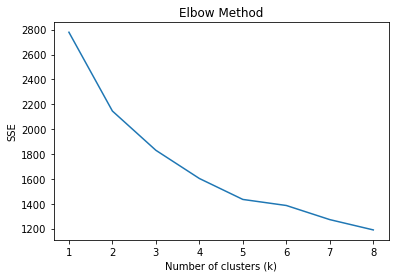

In [5]:
sse = []
for k in range(1, 9):
    kmeans = KMeans(n_clusters=k, max_iter=300, random_state=0)
    kmeans.fit(MD_x)
    sse.append(kmeans.inertia_)

plt.plot(range(1, 9), sse)
plt.title('Elbow Method')
plt.xlabel('Number of clusters (k)')
plt.ylabel('SSE')
plt.show()

In [6]:
kmeans = KMeans(n_clusters=4, random_state=1234).fit(MD_x)
labels = kmeans.labels_

# Gaussian mixture modeling

In [7]:
gm = GaussianMixture(n_components=4, random_state=1234).fit(MD_x)
labels_gm = gm.predict(MD_x)

# Model comparison

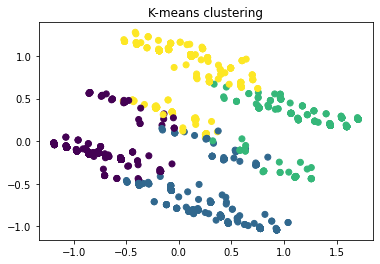

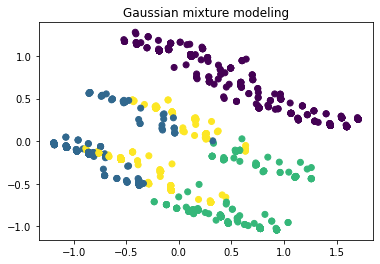

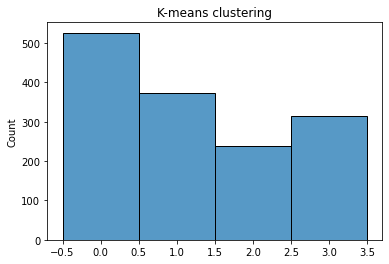

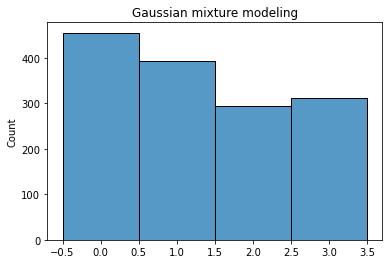

In [8]:
plt.scatter(MD_pca[:, 0], MD_pca[:, 1], c=labels)
plt.title("K-means clustering")
plt.show()

plt.scatter(MD_pca[:, 0], MD_pca[:, 1], c=labels_gm)
plt.title("Gaussian mixture modeling")
plt.show()

sns.histplot(labels, discrete=True, kde=False)
plt.title("K-means clustering")
plt.show()

sns.histplot(labels_gm, discrete=True, kde=False)
plt.title("Gaussian mixture modeling")
plt.show()